In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import random
from time import time

In [ ]:
w = 28
h = 28
k = 10
batch_size = 64
learning_rate = 0.1
s = 300
epochs = 20

input_size = w * h
hidden_size = s
output_size = k

In [46]:
with open("/content/train-images.idx3-ubyte", 'rb') as file:
        imagesTrain = np.frombuffer(file.read(), np.uint8, offset=16).reshape(-1, w, h)
with open("/content/train-labels.idx1-ubyte", 'rb') as file:
        labelsTrain = np.frombuffer(file.read(), np.uint8, offset=8)
with open("/content/t10k-images.idx3-ubyte", 'rb') as file:
        imagesTest = np.frombuffer(file.read(), np.uint8, offset=16).reshape(-1, w, h)
with open("/content/t10k-labels.idx1-ubyte", 'rb') as file:
        labelsTest = np.frombuffer(file.read(), np.uint8, offset=8)

def show_images(title, images, labels):
    imgsCount = 5

    fig, axes = plt.subplots(imgsCount, imgsCount)
    fig.suptitle(title)
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

    for i, axes in enumerate(axes.flat):
        axes.imshow(images[i], cmap = 'gray')
        axes.text(0, 5, str(labels[i]), color = 'white')

Количество тренировочных данных: 60000
Количество тестовых данных: 10000


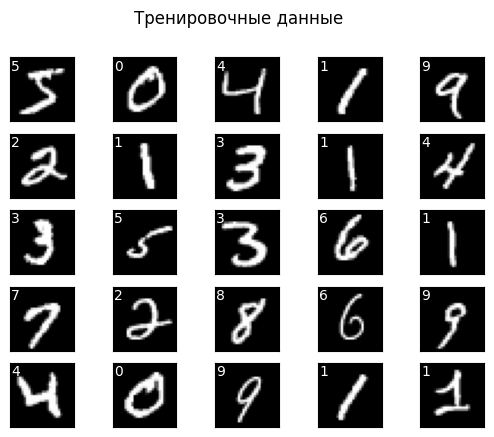

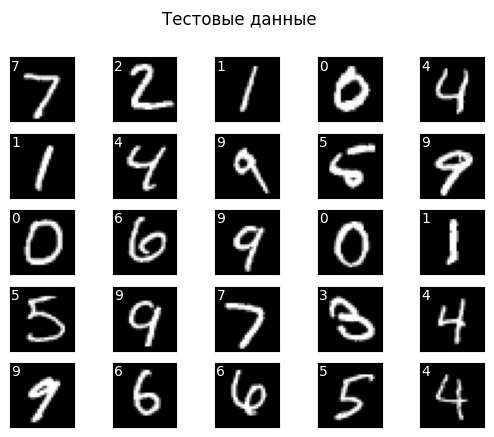

In [47]:
print('Количество тренировочных данных:', len(imagesTrain))
print('Количество тестовых данных:', len(imagesTest))

show_images('Тренировочные данные', imagesTrain, labelsTrain)
show_images('Тестовые данные', imagesTest, labelsTest)

In [48]:
def relu(x):
    return np.maximum(x, 0)

def relu_derivative(x):
    return x > 0

def softmax(vector):
    return np.exp(vector) / np.sum(np.exp(vector), axis=1, keepdims=True)

def cross_entropy(y, A):
    epsilon = 1e-9
    num_samples = y.shape[0]
    return -np.sum(y * np.log(A + epsilon)) / num_samples

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

In [59]:
def init(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * 0.025
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.025
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

def update(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def forward_propagation(W1, b1, W2, b2, X):
    Z1 =  np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_propagation(X, Y, Z1, A1, Z2, A2, W2):
    L = Y.shape[0]
    dZ2 = A2 - Y
    dw2 = np.dot(A1.T, dZ2) / L
    dReLU = relu_derivative(Z1)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 =  dA1* dReLU
    dw1 = np.dot(X.T, dZ1) / L
    db2 = np.sum(dZ2, axis=0, keepdims=True) / L
    db1 = np.sum(dZ1, axis=0, keepdims=True) / L
    return dw1, db1, dw2, db2

In [63]:
imagesTrain = imagesTrain.reshape(-1, w * h)
imagesTest = imagesTest.reshape(-1, w * h)

imagesTrain = imagesTrain.astype('float64') / 255
imagesTest = imagesTest.astype('float64') / 255

y_train = one_hot(labelsTrain)
y_test = one_hot(labelsTest)
X_train = imagesTrain
X_test = imagesTest

In [64]:
def get_batches(X_train, y_train, batch_size):
    for i in range(0, X_train.shape[0], batch_size):
        yield X_train[i:i + batch_size], y_train[i:i + batch_size]

def evaluate_accuracy(X_data, y_data, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X_data)
    return np.mean(np.argmax(A2, axis=1) == np.argmax(y_data, axis=1))

def train(X_train, y_train, X_test, y_test, learning_rate, batch_size, epochs, input_size, hidden_size, output_size):
    W1, b1, W2, b2 = init(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        start = time()

        for X_batch, y_batch in get_batches(X_train, y_train, batch_size):
            Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X_batch)
            dW1, db1, dW2, db2 = backward_propagation(X_batch, y_batch, Z1, A1, Z2, A2, W2)
            W1, b1, W2, b2 = update(learning_rate, W1, b1, W2, b2, dW1, db1, dW2, db2)

        accuracy = evaluate_accuracy(X_train, y_train, W1, b1, W2, b2)
        end = time()

        print(f"Epoch {epoch + 1}: Time: {end - start:.1f} seconds; Accuracy: {accuracy:.6f};")

    test_accuracy = evaluate_accuracy(X_test, y_test, W1, b1, W2, b2)
    print(f"Accuracy: {test_accuracy:.6f}")

    return W1, b1, W2, b2

In [65]:
trained = train(X_train, y_train, X_test, y_test, learning_rate, batch_size, epochs, input_size, hidden_size, output_size)

Epoch 1: Time: 5.6 seconds; Accuracy: 0.920783;
Epoch 2: Time: 7.6 seconds; Accuracy: 0.945717;
Epoch 3: Time: 5.3 seconds; Accuracy: 0.958817;
Epoch 4: Time: 6.8 seconds; Accuracy: 0.967117;
Epoch 5: Time: 5.2 seconds; Accuracy: 0.972400;
Epoch 6: Time: 5.6 seconds; Accuracy: 0.976483;
Epoch 7: Time: 7.1 seconds; Accuracy: 0.979433;
Epoch 8: Time: 7.0 seconds; Accuracy: 0.981433;
Epoch 9: Time: 7.7 seconds; Accuracy: 0.983483;
Epoch 10: Time: 6.3 seconds; Accuracy: 0.985467;
Epoch 11: Time: 8.8 seconds; Accuracy: 0.987000;
Epoch 12: Time: 5.9 seconds; Accuracy: 0.988133;
Epoch 13: Time: 7.9 seconds; Accuracy: 0.989267;
Epoch 14: Time: 5.3 seconds; Accuracy: 0.990383;
Epoch 15: Time: 8.1 seconds; Accuracy: 0.991283;
Epoch 16: Time: 5.8 seconds; Accuracy: 0.992067;
Epoch 17: Time: 7.9 seconds; Accuracy: 0.992783;
Epoch 18: Time: 5.7 seconds; Accuracy: 0.993400;
Epoch 19: Time: 7.5 seconds; Accuracy: 0.993950;
Epoch 20: Time: 5.9 seconds; Accuracy: 0.994533;
Accuracy: 0.978400
